<a href="https://colab.research.google.com/github/UlinYang/pycs4001/blob/main/population__analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [205]:
data_url = '/content/drive/MyDrive/Colab Notebooks/project1/2022_population.csv'
df = pd.read_csv(data_url)

In [206]:
df

,iso_code,country,2022_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,425,885,637","1,424,929,781","9,706,961 sq_km",147/sq_km,-0.00%,17.88%,1
1,IND,India,"1,417,383,346","1,396,387,127","3,287,590 sq_km",431/sq_km,0.68%,17.77%,2
2,USA,United States,"338,324,095","335,942,003","9,372,610 sq_km",36/sq_km,0.38%,4.24%,3
3,IDN,Indonesia,"275,539,689","271,857,970","1,904,569 sq_km",145/sq_km,0.64%,3.45%,4
4,PAK,Pakistan,"235,924,532","227,196,741","881,912 sq_km",267/sq_km,1.91%,2.96%,5
...,...,...,...,...,...,...,...,...,...
219,MSR,Montserrat,"4,390","4,500",102 sq_km,43/sq_km,-0.61%,0.00%,230
220,FLK,Falkland Islands,"3,780","3,747","12,173 sq_km",0/sq_km,0.43%,0.00%,231
221,NIU,Niue,"1,934","1,942",260 sq_km,7/sq_km,-0.15%,0.00%,232
222,TKL,Tokelau,"1,871","1,827",12 sq_km,156/sq_km,1.19%,0.00%,233


In [207]:
df = df.drop(columns=['iso_code', '2020_population', 'area', 'density_sq_km', 'rank'])
df = df.drop([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223])
df

,country,2022_last_updated,growth_rate,world_%
0,China,"1,425,885,637",-0.00%,17.88%
1,India,"1,417,383,346",0.68%,17.77%
2,United States,"338,324,095",0.38%,4.24%
3,Indonesia,"275,539,689",0.64%,3.45%
4,Pakistan,"235,924,532",1.91%,2.96%


In [222]:
df.loc[5]=['others', 4174473156, 0, 1-0.463]
df

,country,2022_last_updated,growth_rate,world_%
0,China,1.425886e+09,-0.0000,0.1788
1,India,1.417383e+09,0.0068,0.1777
2,United States,3.383241e+08,0.0038,0.0424
3,Indonesia,2.755397e+08,0.0064,0.0345
4,Pakistan,2.359245e+08,0.0191,0.0296
5,others,4.174473e+09,0.0000,0.5370


In [209]:
def convert_population(value):
  new_value = value.replace(',', '')
  return np.float(new_value)

In [210]:
df['2022_last_updated'].apply(convert_population)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


0    1.425886e+09
1    1.417383e+09
2    3.383241e+08
3    2.755397e+08
4    2.359245e+08
Name: 2022_last_updated, dtype: float64

In [212]:
df['2022_last_updated'] = df['2022_last_updated'].apply(convert_population)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [213]:
Total = df['2022_last_updated'].sum()
print ("2022_last_updated sum:",Total)

2022_last_updated sum: 3693057299.0


In [214]:
def convert_percent(value):
  new_value = value.replace('%', '')
  return float(new_value) / 100

In [215]:
df['growth_rate'].apply(convert_percent)
df['world_%'].apply(convert_percent)

0    0.1788
1    0.1777
2    0.0424
3    0.0345
4    0.0296
Name: world_%, dtype: float64

In [216]:
df['growth_rate'] = df['growth_rate'].apply(convert_percent)
df['world_%'] = df['world_%'].apply(convert_percent)

In [217]:
Total = df['growth_rate'].sum()
print ("growth_rate sum:",Total)
Total = df['world_%'].sum()
print ("world_% sum:",Total)

growth_rate sum: 0.0361
world_% sum: 0.463


In [218]:
df.dtypes

country               object
2022_last_updated    float64
growth_rate          float64
world_%              float64
dtype: object

In [219]:
df.describe()

,2022_last_updated,growth_rate,world_%
count,5.000000e+00,5.000000,5.000000
mean,7.386115e+08,0.007220,0.092600
std,6.245872e+08,0.007173,0.078322
min,2.359245e+08,-0.000000,0.029600
25%,2.755397e+08,0.003800,0.034500
50%,3.383241e+08,0.006400,0.042400
75%,1.417383e+09,0.006800,0.177700
max,1.425886e+09,0.019100,0.178800


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            5 non-null      object 
 1   2022_last_updated  5 non-null      float64
 2   2020_population    5 non-null      float64
 3   growth_rate        5 non-null      float64
 4   world_%            5 non-null      float64
dtypes: float64(4), object(1)
memory usage: 240.0+ bytes


In [248]:
population_count = df['2022_last_updated'].value_counts()
population_count

1.425886e+09    1
1.417383e+09    1
3.383241e+08    1
2.755397e+08    1
2.359245e+08    1
4.174473e+09    1
Name: 2022_last_updated, dtype: int64

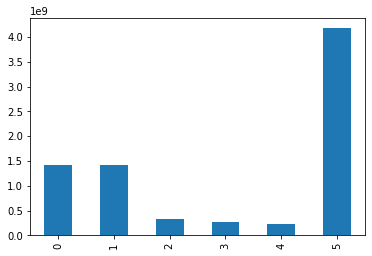

In [223]:
axc = df['2022_last_updated'].plot.bar()

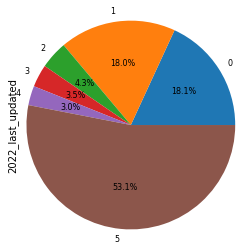

In [252]:
pie_chart = df['2022_last_updated'].plot.pie(autopct = '%1.1f%%', fontsize = 8, radius = 1.2)
plt.show()

In [249]:
contry_population_mean = df.groupby(["country"])["2022_last_updated"].mean().sort_values(ascending=False)
print(contry_population_mean)

country
others           4.174473e+09
China            1.425886e+09
India            1.417383e+09
United States    3.383241e+08
Indonesia        2.755397e+08
Pakistan         2.359245e+08
Name: 2022_last_updated, dtype: float64


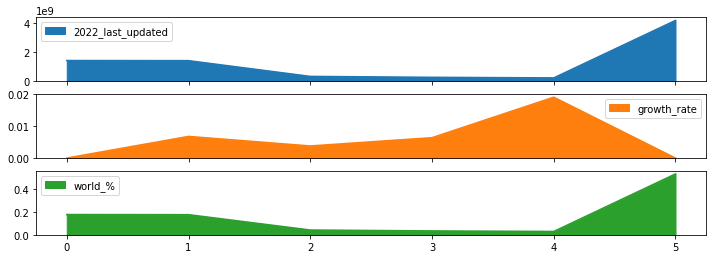

In [239]:
axs = df.plot.area(figsize=(12, 4), subplots=True)

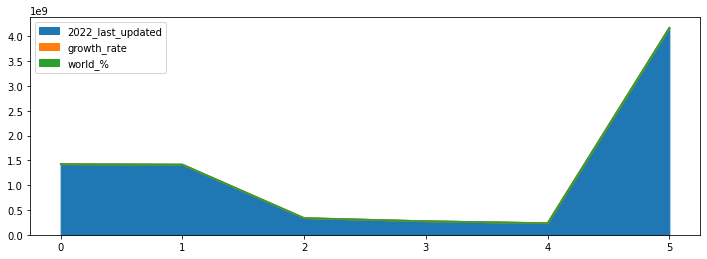

In [240]:
axs = df.plot.area(figsize=(12, 4), subplots=False)

In [241]:
df.cumsum()

,country,2022_last_updated,growth_rate,world_%
0,China,1.425886e+09,-0.0000,0.1788
1,ChinaIndia,2.843269e+09,0.0068,0.3565
2,ChinaIndiaUnited States,3.181593e+09,0.0106,0.3989
3,ChinaIndiaUnited StatesIndonesia,3.457133e+09,0.0170,0.4334
4,ChinaIndiaUnited StatesIndonesiaPakistan,3.693057e+09,0.0361,0.4630
5,ChinaIndiaUnited StatesIndonesiaPakistanothers,7.867530e+09,0.0361,1.0000


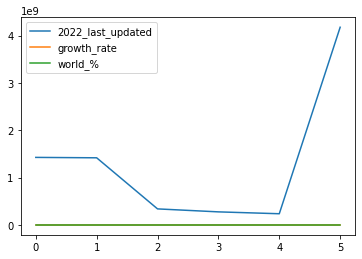

In [242]:
df.plot()

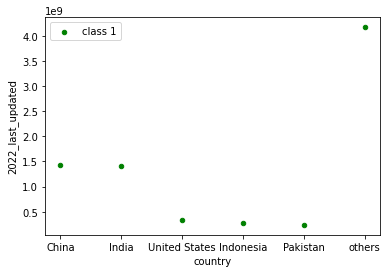

In [245]:
df.plot.scatter(x='country', y ='2022_last_updated', color='Green', label='class 1')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


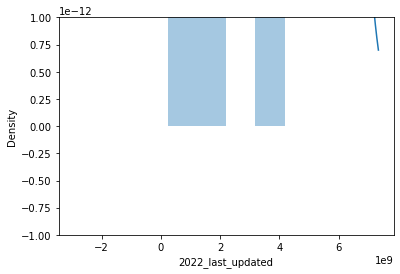

In [258]:
plt.title("") 
sns.distplot(df['2022_last_updated']) 
plt.show() 

In [117]:
n = int(input())
for i in range(n):
  if i<n:
    print(i, end=",")
    i+=1

224
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,

# **總結: 這次的小Project礙於我缺席該課堂以及Pandas教學的影片並為上架，於是我花了許多時間上網自學，雖然做的結果有些差強人意但過程中我學到了許多實用的技巧。我認為找到好的Dataset或許就成功了一半，因為有些過大的數字用到逗點或是涉及貨幣符號的資料會有認定成字串的可能，因此需要多花點步驟來重制成float，以便於後續作圖。。**